# Introduction

This is going to be my attempt at *Homework_4b*. I try my best to explain every code block through leaving comments next to my python code 

***(Comments start with a # symbol)***. 

# Importing the needed libraries

In [1]:
import pandas as pd # For reading and importing csv file
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting

%matplotlib inline

# Importing the csv file and defining every data column

In [2]:
df = pd.read_csv("hw_4b.csv") # Importing csv file as a DataFrame

row = df['Row'] # First column (Row)
sensirion = df['Sensirion'] # Second column (Sensirion)
panasonic = df['Panasonic'] # Third column (Panasonic)

# Plotting the data

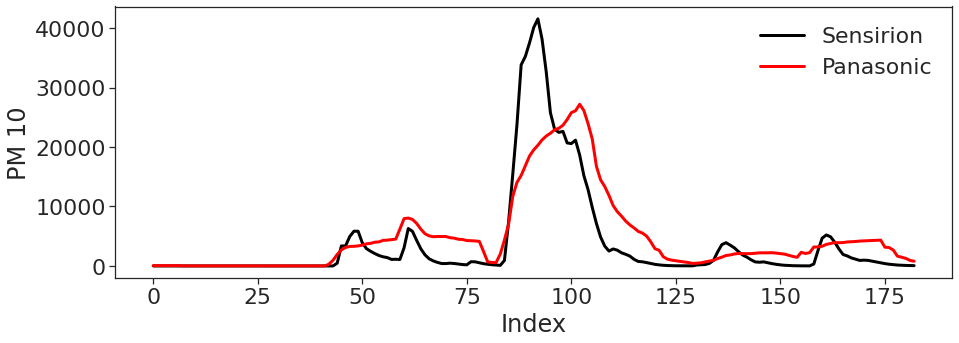

In [3]:
# Setting the styling preference for the plot

sns.set_theme(style='white') 
sns.set_theme(style='ticks',font_scale=2)

# Defining the figure and plotting the data

plt.figure(figsize=(15,5))
sns.lineplot(x=row,y=sensirion,linewidth=3,color='black',label="Sensirion")
sns.lineplot(x=row,y=panasonic,linewidth=3,color='red',label="Panasonic")
plt.ylabel("PM 10")
plt.xlabel("Index")
plt.legend(frameon=False)

# Analysis

Let's say every data point of column *Panasonic* be $a_i$, such that 
$$1 <i< 183,$$
and let $R_n$ be the recovered data points, and n indexed from 1 to the maximum number of recovered points. Also, let $w$ be the window size.

For the sake of explaining my method, I will assume the window size $w$ to be 7, but that is only for this analysis. 
So now, the first moving average point from the *Panasonic* columns, $a_1$ is

$$a_1 = \frac{R_1 + R_2 + R_3 + R_4 + R_5 + R_6 + R_7}{7}. $$

We can also write $a_2$ as 

$$a_2 = \frac{R_2 + R_3 + R_4 + R_5 + R_6 + R_7 + R_8}{7}. $$

We can generalize a moving average point $a_i$ to be

$$ a_i = \frac{R_i + R_{i+1} + ... + R_{i + (w-1)}}{w} $$

Now, the difference between two consecutive moving average points can be expressed as 

$$ a_i - a_{i-1} = \frac{R_{i + (w-1)} - R_{i-1}}{w} $$

The above expression can be rearranged to become

$$ R_{i+(w-1)} = w(a_i - a_{i-1}) + R_{i-1} $$

# Finding Window Size

The first thing to do is finding the window size.

First, I will plot the difference of the moving average points, $a_i - a_{i-1}$ for all the data points found in the *Panasonic* column.

Text(0.5, 1.0, 'Panasonic Difference')

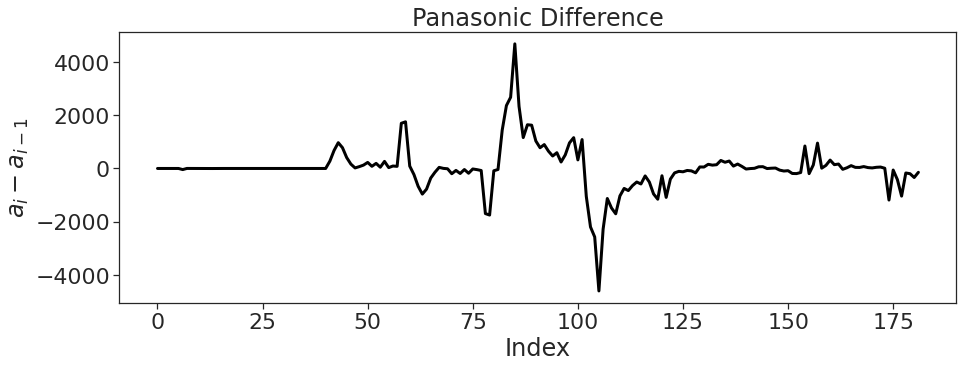

In [4]:
average_difference = [] # Array which will contain all the moving average differences.

# This loop will go through all the data points in the Panasonic column and find their difference.

for i in range(len(panasonic)):
    if i < len(panasonic) - 1:
        average_difference.append(panasonic[i+1] - panasonic[i]) 
    else:
        continue
        
index_average_difference = list(range(len(average_difference)))

# These lines are for plotting the difference

plt.figure(figsize=(15,5))
sns.lineplot(x=index_average_difference,y=average_difference,color='black',linewidth=3)
plt.xlabel("Index")
plt.ylabel(r'$a_i - a_{i-1}$')
plt.title("Panasonic Difference")

From the above figure, we can find the window size. 

Window size is distance between crest and trough, which can be found by subtracting the index of the trough with the index of the crest. In other words, window size is the width between two peaks

In [5]:
# This line of code looks for the minimum and maximum in the difference array and finds their width.

window_size = average_difference.index(min(average_difference)) - average_difference.index(max(average_difference))

$$ window\_size = 20 $$

# Predicting the first 20 values

For this method to work, we need to predict the first 20 values in the data, and build the rest of the *recovered* data based on those first 20 points.

I set the first 20 points to be equal to 4. I noticed that whatever I set the first 20 points to be, being something that is reasonable (like 0's or 1 t0 20), the recovered data always comes out being the same, so I left the first 20 points to be 4's.

In [6]:
# This is the array which will contain all the recovered data.
# But first, I only put the first 20 predicited values in that array, which I set to be 4's.

raw_values = window_size*[4]

Now that I know my window size and the first 20 values of my dataset, I can proceed by recovering the rest of the data, which will be done by recalling the expressing mentioned earlier,

$$ R_{i+(w-1)} = w(a_i - a_{i-1}) + R_{i-1}. $$

In [7]:
# This loop finds the recovered data by solving for the above expression

for i in range(1,max(index_average_difference) + 1):
    
    try:
        
      raw_values.append(window_size * (panasonic[i] - panasonic[i-1]) + raw_values[i-1])
        
    except:
        
        pass

# Plotting the recovered data 

In the code block below, I plot the recovered data of the *Panasonic* along with the *Sensirion* data given in the original data file. 

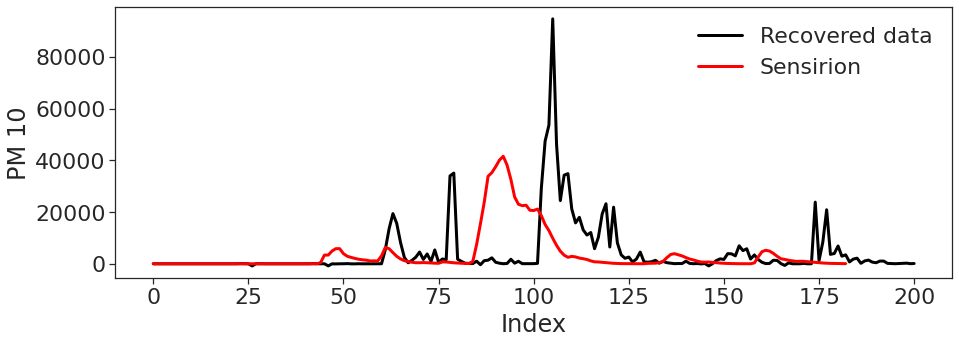

In [8]:
# Plotting the recovered data with Sensirion

x = list(range(len(raw_values)))
raw_values =  pd.Series(raw_values)

plt.figure(figsize=(15,5))
sns.lineplot(x=x,y=raw_values,color='black',linewidth=3,label='Recovered data')
sns.lineplot(x=row,y=sensirion,color='red',linewidth=3,label='Sensirion')
plt.xlabel("Index")
plt.ylabel("PM 10")
plt.legend(frameon=False)

# Conclusion

It can be seen from the above plot that the *Panasonic* is able to measure way more particles, however, has a slower response time than the *Sensirion*.

I also think my recovered data might be shifted, and I did not account for the shift.